## Perform Simple Linear Regression in Python (Step-by-Step)

### Mannual Way

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(20,10)

In [6]:
# Reading Data

data = pd.DataFrame({'hours': [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14],
                   'score': [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89]})
      

data.shape, data.head()

((15, 2),
    hours  score
 0      1     64
 1      2     66
 2      4     76
 3      5     73
 4      5     74)

In [7]:
# Collecting X and Y

X= data['hours'].values
Y= data['score'].values
X,Y

(array([ 1,  2,  4,  5,  5,  6,  6,  7,  8, 10, 11, 11, 12, 12, 14],
       dtype=int64),
 array([64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89],
       dtype=int64))

In [8]:
# Mean X and Mean Y

mean_X= np.mean(X)
mean_Y= np.mean(Y)
mean_X,mean_Y

(7.6, 80.4)

In [9]:
# Calculate total number of values in data

m= len(X)
m

15

In [12]:
# Calculate b1 and b0 using the formula

numer= 0
denom= 0

for i in range(m):
    numer+=(X[i]-mean_X)*(Y[i]-mean_Y)
    denom+=(X[i]-mean_X)**2
    
b1= numer/denom
b0= mean_Y-(b1*mean_X)

print('Coefficients')
print(b1,b0)

Coefficients
1.9823747680890538 65.3339517625232


In [14]:
# Creating regression equation using coefficients
score_pred= b0+b1*X
score_pred

array([67.31632653, 69.2987013 , 73.26345083, 75.2458256 , 75.2458256 ,
       77.22820037, 77.22820037, 79.21057514, 81.19294991, 85.15769944,
       87.14007421, 87.14007421, 89.12244898, 89.12244898, 93.08719852])

AttributeError: 'PathCollection' object has no property 'col'

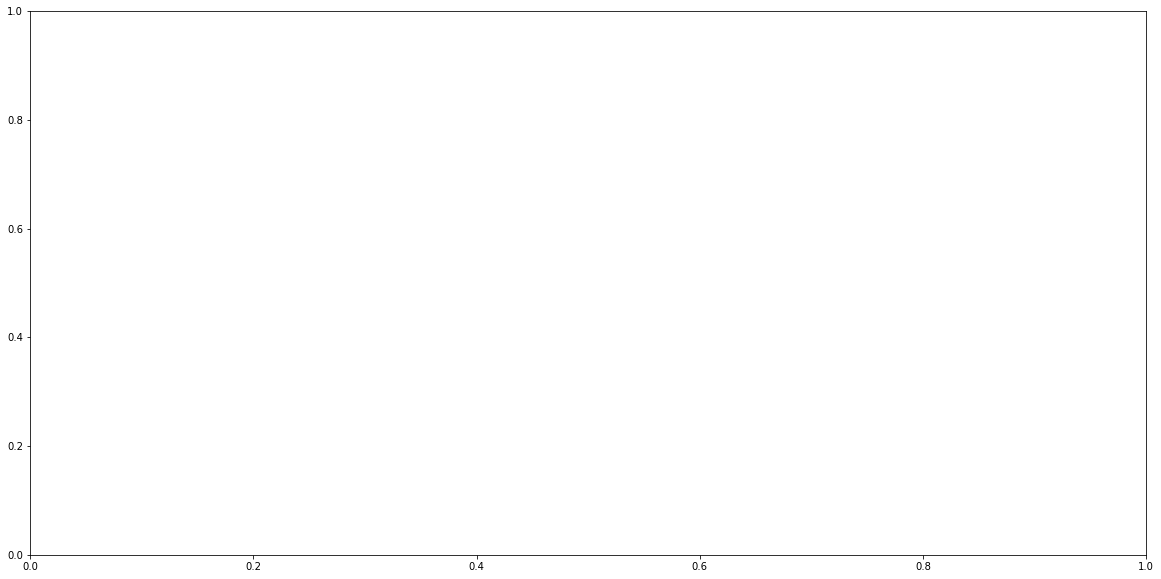

In [16]:
plt.scatter(X, Y, col='red', marker='*')
plt.scatter(X, score_pred, colo='blue', marker='+')

In [17]:
#Checkinh accuracy of model using r-squared

ss_t= 0
ss_r= 0

for i in range(m):
    y_pred= b0+b1*X[i]
    ss_t+=(Y[i]-mean_Y)**2
    ss_r+=(Y[i]-y_pred)**2

r_squared= 1-(ss_r/ss_t)
print(r_squared)

0.8309797723433322


In [ ]:
# Calculating Adjusted R-Square



## Perform Simple Linear Regression in Python (Step-by-Step)

### OLS Way

In [18]:
#create dataset
df = pd.DataFrame({'hours': [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14],
                   'score': [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89]})
      

#view first six rows of dataset
df[0:6]


,hours,score
0,1,64
1,2,66
2,4,76
3,5,73
4,5,74
5,6,81


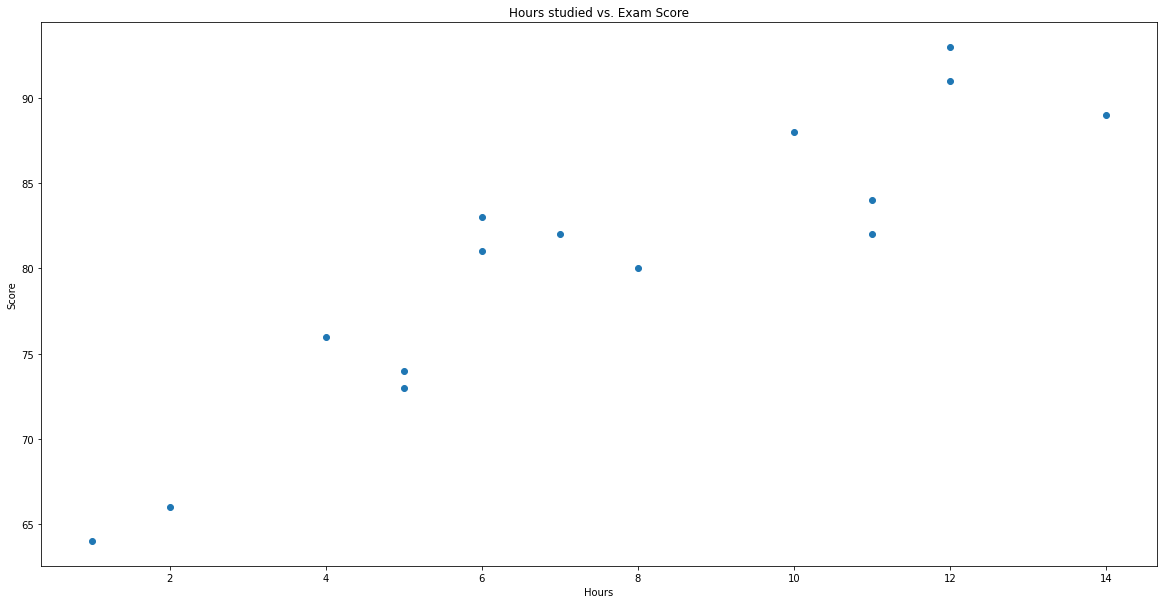

In [19]:
import matplotlib.pyplot as plt

plt.scatter(df.hours, df.score)
plt.title('Hours studied vs. Exam Score')
plt.xlabel('Hours')
plt.ylabel('Score')
plt.show()

<AxesSubplot:>

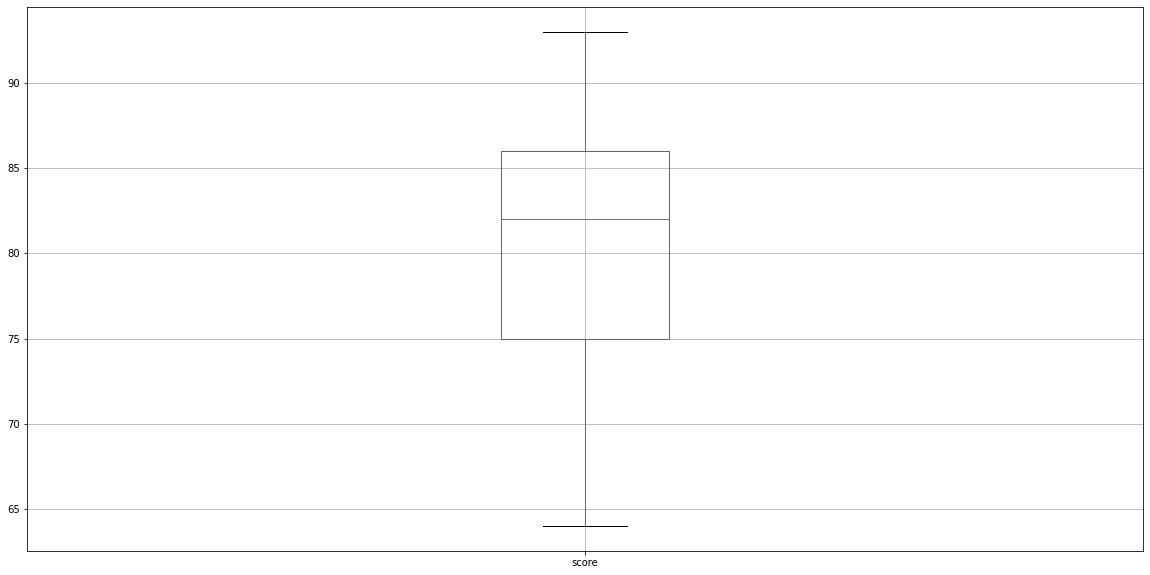

In [20]:
df.boxplot(column=['score'])

In [21]:
import statsmodels.api as sm

#define response variable
y = df['score']

#define explanatory variable
x = df[['hours']]

#add constant to predictor variables
x = sm.add_constant(x)

#fit linear regression model
model = sm.OLS(y, x).fit()

#view model summary
print(model.summary())

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     63.91
Date:                Mon, 30 May 2022   Prob (F-statistic):           2.25e-06
Time:                        10:17:03   Log-Likelihood:                -39.594
No. Observations:                  15   AIC:                             83.19
Df Residuals:                      13   BIC:                             84.60
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         65.3340      2.106     31.023      0.0

C:\Users\Manoj\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Perform Simple Linear Regression in Python (Step-by-Step)

### SKLearn way

In [22]:
from sklearn.linear_model import LinearRegression

In [23]:
#create dataset
data = pd.DataFrame({'hours': [1, 2, 4, 5, 5, 6, 6, 7, 8, 10, 11, 11, 12, 12, 14],
                   'score': [64, 66, 76, 73, 74, 81, 83, 82, 80, 88, 84, 82, 91, 93, 89]})
      

#view first six rows of dataset
print(data.shape)
print(data.head())

(15, 2)
   hours  score
0      1     64
1      2     66
2      4     76
3      5     73
4      5     74


In [33]:
# Collecting X and Y

X= data[['hours']]
Y= data['score']

In [35]:
# Creating a Linear Model

reg= LinearRegression()

# Training the Model

reg.fit(X,Y)

# Finding Coefficients

slope= reg.coef_
Y_intercept= reg.intercept_

print('Slope= ', slope)
print('Y-Intercept= ', Y_intercept)
# Predicting using Model

Y_predicted= reg.predict(X)
print(Y_predicted)

Slope=  [1.98237477]
Y-Intercept=  65.3339517625232
[67.31632653 69.2987013  73.26345083 75.2458256  75.2458256  77.22820037
 77.22820037 79.21057514 81.19294991 85.15769944 87.14007421 87.14007421
 89.12244898 89.12244898 93.08719852]


In [36]:
# Finding R-Square

reg.score(X,y)

0.830979772343332

In [39]:
# Finding p-value

import statsmodels.api as sm
mod = sm.OLS(Y,X)
fii = mod.fit()
p_values = fii.summary2().tables[1]['P>|t|']

C:\Users\Manoj\anaconda3\lib\site-packages\scipy\stats\stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


## Multiple Linear Regression

### Step 1: Enter the data

In [43]:
# Reading Data

#create data
data_m = pd.DataFrame({'hours': [1, 2, 2, 4, 2, 1, 5, 4, 2, 4, 4, 3, 6, 5, 3, 4, 6, 2, 1, 2],
                   'exams': [1, 3, 3, 5, 2, 2, 1, 1, 0, 3, 4, 3, 2, 4, 4, 4, 5, 1, 0, 1],
                   'score': [76, 78, 85, 88, 72, 69, 94, 94, 88, 92, 90, 75, 96, 90, 82, 85, 99, 83, 62, 76]})
data_m.shape, data_m.head()

((20, 3),
    hours  exams  score
 0      1      1     76
 1      2      3     78
 2      2      3     85
 3      4      5     88
 4      2      2     72)

### Step 2: Perform linear regression

In [46]:
import statsmodels.api as sm

# Collect X and Y

#define predictor variables
X= data_m[['hours','exams']]

#define response variable
Y= data_m['score']


#add constant to predictor variables

X= sm.add_constant(X)

#fit linear regression model

reg= sm.OLS(Y,X).fit()

reg.summary()

C:\Users\Manoj\anaconda3\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  score   R-squared:                       0.734
Model:                            OLS   Adj. R-squared:                  0.703
Method:                 Least Squares   F-statistic:                     23.46
Date:                Mon, 30 May 2022   Prob (F-statistic):           1.29e-05
Time:                        10:56:43   Log-Likelihood:                -60.354
No. Observations:                  20   AIC:                             126.7
Df Residuals:                      17   BIC:                             129.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         67.6735      2.816     24.033      0.000      61.733      73.614
hours          5.5557      0.899      6.179      0.000       3.659       7.453
exams         -0.6017      0.914     -0.658      0.519      -2.531       1.327
==============================================================================
Omnibus:                        0.341   Durbin-Watson:                   1.506
Prob(Omnibus):                  0.843   Jarque-Bera (JB):                0.196
Skew:                          -0.216   Prob(JB):                        0.907
Kurtosis:                       2.782   Cond. No.                         10.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
# Multiple linear regression equation: y= b0+b1x+b2*x+.....+bnxn

exam_score = 67.67 + 5.56*100 - 0.60*2
exam_score

622.4699999999999

In [51]:
# Using SKLearn
from sklearn.linear_model import LinearRegression 
model= LinearRegression()
model.fit(X,Y)

print(model.coef_)
print(model.intercept_)

[ 0.         5.5557483 -0.6016868]
67.67352554133268


In [52]:
model.score(X,Y)

0.7340272170388176